# Common Password List ( rockyou.txt )

## Введение

В 2009 году компания RockYou столкнулась с серьезным инцидентом взлома. Один из основных проблем был тот факт, что они хранили пароли пользователей в незашифрованном виде, что позволило злоумышленникам получить доступ к этим данным. В результате, список всех паролей был украден и стал доступным для общего пользования. Это было серьезным нарушением безопасности, которое подчеркивает важность правильного хранения и защиты паролей пользователей.

# Анализ паролей

## Подключаем библиотеки которые в дальнейшем будем использовать

Первая бибилеотека pandas, она нам понадобиться для выгрузки информации для её анализа                                                                                             
matplotlib и seaborn для отображения графиков
numpy для расчетов и вычислений 
Далее выгружаем наш дата сет

In [2]:
import pandas as pd # Для выгрузки этого
import numpy as np # для рассчетов
import matplotlib.pyplot as plt # графика 
import seaborn as sns # тоже графика 
from collections.abc import Iterable

In [ ]:
arr = pd.read_csv('New_rockyou.txt', encoding='UTF-8', sep='\t')
print(arr)

               Password
0                123456
1                 12345
2             123456789
3              password
4              iloveyou
...                 ...
14344241       xCvBnM,
14344242        ie168
14344243    abygurl69
14344244       a6_123
14344245  *7Â¡Vamos!

[14344246 rows x 1 columns]


In [49]:
arr.count()

Password    14343348
dtype: int64

14344246


## Чистка

У меня возникла ситуация, когда у нас имеется набор данных, содержащий различные пароли. 

Однако, в этом наборе данных присутствуют нежелательные элементы, такие как гиперссылки и HTML-разметка. Моя цель заключается в удалении этих нежелательных элементов из набора данных, чтобы получить более чистые и удобные данные для дальнейшего анализа их. Код ниже как раз таки это и делает

In [48]:
index=0
delpos=[]
for k in arr.Password:
    if isinsindexance(k, sindexr):
        if "hindexindexp://" in k or "://" in k or "<div>" in k or "<!DOCTYPE" in k or "src=" in k:#Удаление странных ссылок и подобного мусора
            delpos.append(index)
    index+=1
arr=arr.drop(delpos).reseindex_index(drop=True)

delpos - позиции которые по каким либо причинам надо удалить 

index - индекс паролей которые надо удлаить

## Начало анализа

Первым делом я создал отдельные переменные и перекинул туда датасет для дальнейшей обработки 

In [81]:
arr_from_data = arr.values[:]
arr_check=[]
for k in arr_from_data:
    for i in k:
        arr_check.append(i)


arr_from_data - массив с массивами паролей из дата сета

arr_check - просто массив паролей который мы отделили за счет цикла

В данном мы будем перебирать символы котоыре не являются буквами или цифрами

Логика перебора проста если такой элемент есть то по инедексу в первом списке мы добавляем единицу во второй, если такого элемента нет, то мы добавляем его и первый список и добавляем счет во второй и сразу плюсуем ему единицу 


In [82]:
signs_val = []
signs_name = []

for k in arr_check:
    if isinstance(k, Iterable):  
        for j in k:
            if not j.isdigit() and not j.isalpha():
                if j in signs_name:
                    signs_val[signs_name.index(j)] += 1
                else:
                    signs_name.append(j)
                    signs_val.append(0)
                    signs_val[signs_name.index(j)] += 1
print(signs_name, signs_val)

['!', ' ', ';', '-', '*', '.', '?', ',', '/', '±', '#', '@', '$', '%', '^', '&', '+', "'", '[', ']', '<', '_', '\\', '"', '£', ':', '(', ')', '=', '\x85', '\xa0', '\x96', '§', '`', '\x91', '~', '¶', '\x84', '\x95', '\x97', '\x8f', '>', '©', '\x99', '\xad', '¢', '\x9f', '«', '\x9e', '\x81', '\x88', '{', '}', '|', '°', '\x89', '·', '\x94', '¡', '\x80', '\x87', '\x9c', '\x9b', '\x83', '\x9d', '×', '€', '¥', '\x93', '\x90', '\x86', '\x8a', '\x8c', '\x8d', '\x98', '\x92', '\x82', '»', '¿', '¬', '\n', '¯', '®', '\x8b', '\x8e', '\x9a', '÷', '\x7f', '\x08', '\x1a', '\x04', '\x03'] [143161, 95341, 12607, 133268, 123972, 249926, 18407, 30141, 48266, 4350, 49201, 108302, 36167, 10265, 6402, 26562, 27504, 15506, 7748, 10824, 9573, 193590, 28425, 1931, 2027, 6792, 17068, 18992, 18512, 2078, 1712, 1388, 1198, 5679, 527, 8371, 1575, 1868, 1301, 1264, 137, 2482, 726, 2534, 603, 871, 2609, 766, 862, 1358, 2836, 1052, 966, 714, 1442, 747, 1658, 363, 625, 811, 309, 263, 161, 192, 39, 450, 425, 513, 117, 

signs_val - количества определенных по их индексу символов

signs_name - сами символы 


Данный сегмент кода ответственне за определение длинны пароля, работает по такому же принципу как и прошлый сегмент, в дальнейшем нам это пригодиться для определение средней длины пароля у 14 млн пользователей

In [83]:
name_col_word = [] 
num_col_word = []

for k in arr_check:
    if isinstance(k, Iterable):  
        if len(k) in name_col_word:
            num_col_word[name_col_word.index(len(k))] += 1
        else:
            name_col_word.append(len(k))
            num_col_word.append(0)
            num_col_word[name_col_word.index(len(k))] += 1

print(name_col_word, num_col_word)

[5, 9, 8, 7, 6, 10, 11, 4, 13, 12, 16, 17, 15, 3, 14, 2, 18, 39, 26, 20, 1, 22, 19, 21, 23, 24, 38, 28, 30, 40, 27, 35, 34, 32, 42, 43, 37, 49, 33, 25, 44, 36, 29, 41, 31, 53, 48, 77, 47, 45, 165, 50, 150, 149, 137, 71, 61, 59, 58, 57, 52, 63, 95, 67, 51, 64, 60, 55, 85, 78, 66, 54, 84, 80, 70, 73, 109, 81, 69, 56, 72, 65, 46, 68, 75, 88, 62, 79, 74, 123, 252, 87, 93, 89, 118, 195, 97, 92, 104, 98, 188, 255, 142, 208, 230, 228, 90, 82, 103, 189, 171, 126, 125, 218, 76, 111, 101, 200, 192, 243, 124, 148, 117, 151, 249, 239, 86, 170, 105, 154, 129, 145, 106, 141, 108, 146, 131, 113, 232, 83, 133, 198, 94, 91, 185] [259252, 2190979, 2965989, 2506254, 1947861, 2013588, 865983, 17933, 364148, 555316, 118368, 36893, 161184, 2464, 248522, 335, 23776, 113, 2243, 13073, 45, 6159, 15572, 7848, 4848, 4234, 64, 1192, 980, 53, 1809, 127, 183, 398, 67, 40, 78, 17, 296, 2939, 30, 186, 777, 43, 465, 11, 39, 3, 22, 51, 2, 22, 2, 1, 1, 7, 20, 7, 15, 16, 14, 14, 2, 11, 21, 17, 19, 22, 3, 5, 10, 25, 6, 4,

name_col_word - количество символов в пароли

num_col_word - количество количество символов в пароли в массиве по их индексу

Данный сегмент кода ответственне за определение количества букв, работает по такому же принципу как и прошлый сегмент, в дальнейшем нам это пригодиться для определение средней длины пароля у 14 млн пользователей

In [84]:
alf_name = []
alf_val = []

for k in arr_check:
    if isinstance(k, Iterable):  
        for j in k:
            if j.isalpha():
                if j in alf_name:
                    alf_val[alf_name.index(j)] += 1
                else:
                    alf_name.append(j)
                    alf_val.append(0)
                    alf_val[alf_name.index(j)] += 1
print(alf_name, alf_val)

['p', 'a', 's', 'w', 'o', 'r', 'd', 'i', 'l', 'v', 'e', 'y', 'u', 'n', 'c', 'k', 'b', 'g', 'm', 'j', 'h', 'q', 't', 'f', 'z', 'x', 'P', 'A', 'S', 'W', 'O', 'R', 'D', 'I', 'L', 'V', 'E', 'Y', 'U', 'N', 'C', 'B', 'K', 'G', 'J', 'H', 'T', 'M', 'Ã', 'Q', 'F', 'X', 'Z', 'Â', 'à', 'ž', 'â', 'ª', 'µ', 'Œ', 'Å', 'Ä', 'Ž', 'ñ', 'ï', 'Ÿ', 'œ', 'º', 'å', 'æ', 'ø', 'Ù', 'Ø', 'Î', 'Ï', 'Š', 'š', 'é', 'Ð', 'Û', 'Æ', 'ú', 'ó', 'í', 'ì', 'è', 'ä', 'ç', 'ã', 'Ñ', 'á', 'ð', 'ù', 'î', 'Õ', 'Ë', 'Í', 'É', 'Ò', 'Ó', 'È', 'Ì', 'À', 'Ö', 'ü', 'ß', 'ö', 'ý', 'ê', 'Ý'] [1620586, 8832757, 4156268, 800059, 5176728, 4578789, 2485532, 5555134, 4462592, 1051271, 7206510, 2374327, 2308268, 4829916, 2609686, 2012839, 2111759, 1718090, 3206742, 1238040, 2336557, 178661, 3426864, 982177, 763884, 479942, 131645, 604635, 315368, 59728, 330430, 320128, 199376, 356871, 331835, 76283, 459918, 161083, 137343, 316801, 209360, 188204, 144121, 130208, 122449, 163069, 249515, 260211, 7554, 17936, 81115, 36054, 53578, 1723, 34731

alf_name - наименование букв из паролей

alf_val - количество букв по их индексу

Данный сегмент кода ответственный за определение количества из конкретных цифр, работает по такому же принципу как и все сегменты до него, в дальнейшем нам это нам пригодиться для опеределение есть ли в пароли цифры 

In [85]:
num_val = []
num_name = []

for k in arr_check:
    if isinstance(k, Iterable):  
        for j in k:
            if j.isdigit():
                if j in num_name:
                    num_val[num_name.index(j)] += 1
                else:
                    num_name.append(j)
                    num_val.append(0)
                    num_val[num_name.index(j)] += 1
print(num_name, num_val)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '¹', '³', '²'] [6732606, 5235364, 3766253, 3390219, 3353669, 3117291, 3099652, 3566268, 3854572, 5738656, 5487, 1475, 1064]


num_val - коилчество конкретных цифр по их индексу

num_name - сами цифры 


Здесь мы определяем количество гласных и соглысных букв, а для того чтобы в них не попали лишние символы, воспрользуемся аси кодом и подметим что в основном длина аси у обычныхх букв 3, на основе этого выделим

In [86]:
vowels_val = 0
consonants_val = 0

for i in alf_name:
    if len(ascii(i))==3 and i.lower() in "aioeu":
        vowels_val += alf_val[alf_name.index(i)]
    elif len(ascii(i))==3 and not i.lower() in "aioeu":
        consonants_val+=alf_val[alf_name.index(i)]
print(vowels_val,consonants_val)

30968594 50992648


vowels_val - 

consonants_val -  

Здесь мы подсчитываем сколько цифр, букв и символов было во всех паролях 

In [87]:
num=0
alf=0
sign=0
for k in arr_check:
    if isinstance(k, Iterable):  
        for j in k:
            if j.isdigit():
                num+= 1
            elif j.isalpha():
                alf+= 1
            else:
                sign+=1
print(num, alf, sign)

41862576 82045716 1510596


num - количество цифр

alf - количество букв 

sign - количество символов

Данная диаграмма отображает статистику по количеству определеннных символов, можно заметить, что люди чаще всего используют сиволы 1, 2 и 0, странно замечать что цифра три которая находиться рядом находиться лишь на 5ом месте, из чего можно сделать вывод что люди используют эти три символа 

<BarContainer object of 13 artists>

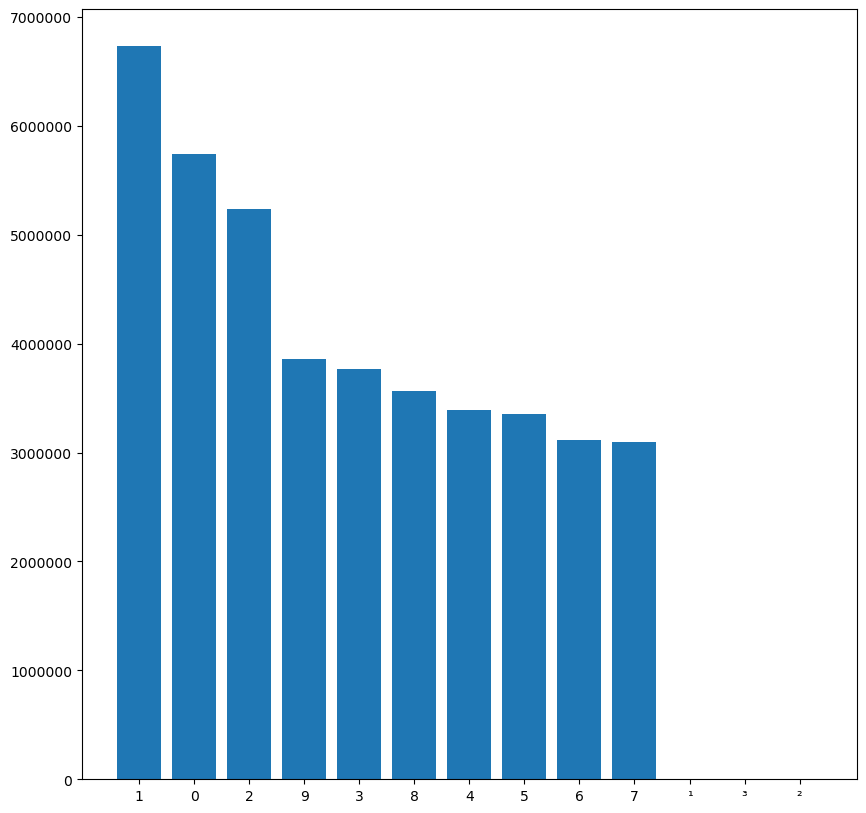

In [88]:
num_bar = pd.DataFrame({'Number':num_name, 'Val':num_val})
plt.figure(figsize=(10, 10))
plt.ticklabel_format(style='plain')
num_bar = num_bar.sort_values('Val', ascending=False)

plt.bar(num_bar.Number,num_bar.Val)

Здесь диаграмма отношения цифр, букв и символов, заметим что люди практически не используют какие либо спец символы, а чаще всего используют или буквы или цифры, отсюда можно сделать вывод что для усиления паролей нужно лишь использовать спец символы 

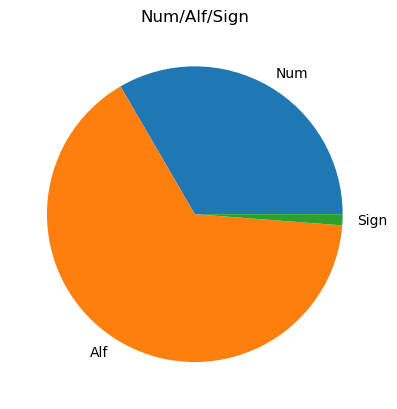

In [89]:
name = ["Num","Alf","Sign"]
val = [num, alf,sign]
plt.title("Num/Alf/Sign") 
plt.pie(val,labels=name)# диаграмма пирог через matplotlib также рандомная
plt.show()

Буквы обозначены оражевым цветом

Цифры обозначены синим цветом

Спец символы обозначены зеленым цветом

In [2]:
word_count = pd.DataFrame({'NameColW':name_col_word, 'ColW':num_col_word})

word_count['ColW']=pd.to_numeric(word_count['ColW'], errors='coerce')

short_other = word_count[word_count.ColW<5000]
long = word_count[word_count.ColW>=5000]

short_sum = short_other.ColW.sum()
short_other=pd.Series(short_sum, index=["ColW"])

bar_pas_col = long.append(pd.Series(short_sum, index=["ColW"], name="24"))
bar_pas_col.NameColW = bar_pas_col.NameColW.fillna('Other')
bar_pas_col = bar_pas_col.sort_values('ColW', ascending=False)

bar_pas_col.plot(kind="bar", y="ColW", x="NameColW", rot=6, fontsize=10, figsize=(15,10))


NameError: name 'pd' is not defined

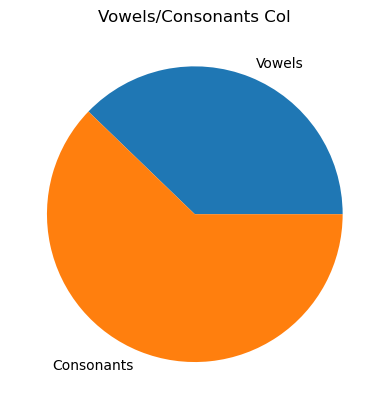

In [91]:
name_v_c = ["Vowels","Consonants"]
val_v_c = [vowels_val,consonants_val]
plt.title("Vowels/Consonants Col") 
plt.pie(val_v_c,labels=name_v_c)
plt.show()

/tmp/ipykernel_4937/879912741.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bar_alf = main_alf.append(pd.Series(other_alfSum, index=["Col"], name="24"))


<Axes: xlabel='Name'>

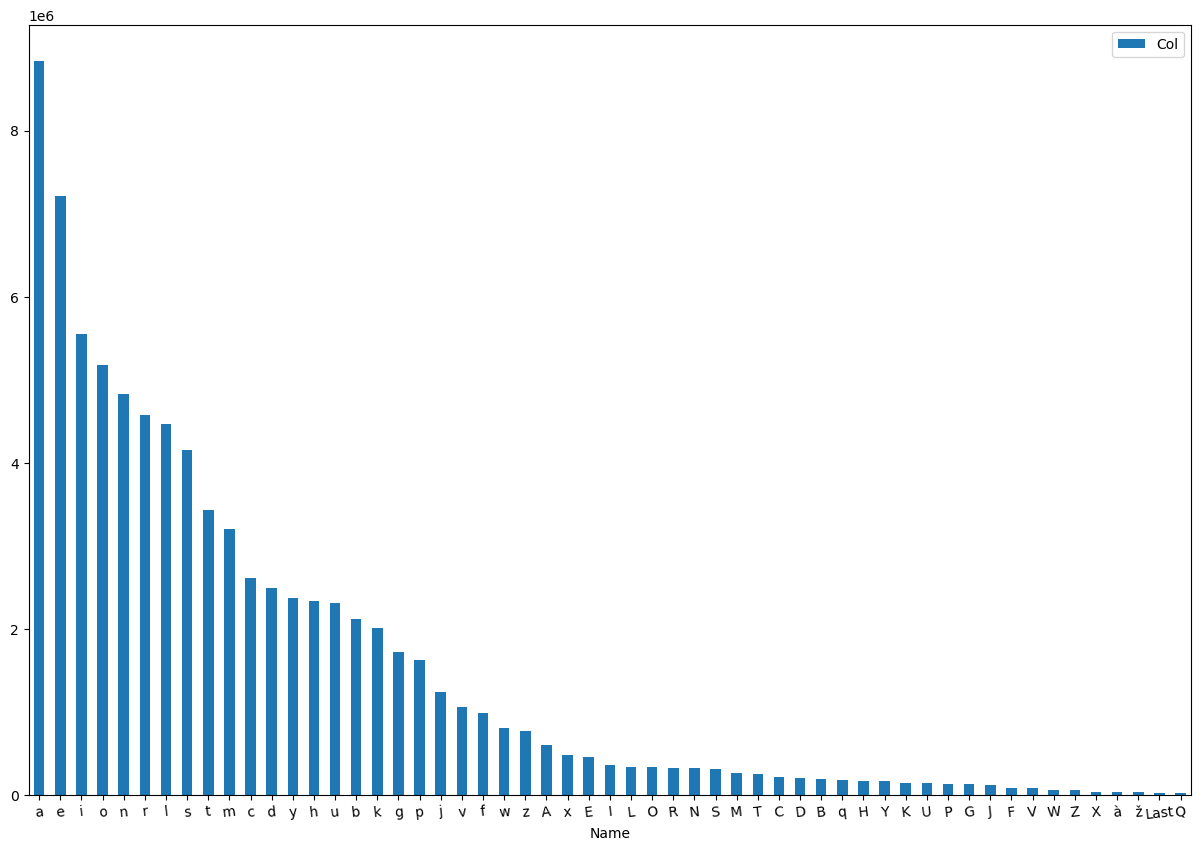

In [92]:
col_alf = pd.DataFrame({'Name':alf_name, 'Col':alf_val})

col_alf['Col']=pd.to_numeric(col_alf['Col'], errors='coerce')

other_alf = col_alf[col_alf.Col<10000]
main_alf = col_alf[col_alf.Col>=10000]

other_alfSum = other_alf.Col.sum()
other_alf=pd.Series(other_alfSum, index=["Col"])

bar_alf = main_alf.append(pd.Series(other_alfSum, index=["Col"], name="24"))
bar_alf.Name = bar_alf.Name.fillna('Last')
bar_alf = bar_alf.sort_values('Col', ascending=False)

bar_alf.plot(kind="bar", y="Col", x="Name", rot=6, fontsize=10, figsize=(15,10))

/tmp/ipykernel_4937/1182615400.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bar_col_word = big_word.append(pd.Series(lit_word_sum, index=["Col"], name="24"))


<Axes: xlabel='Name'>

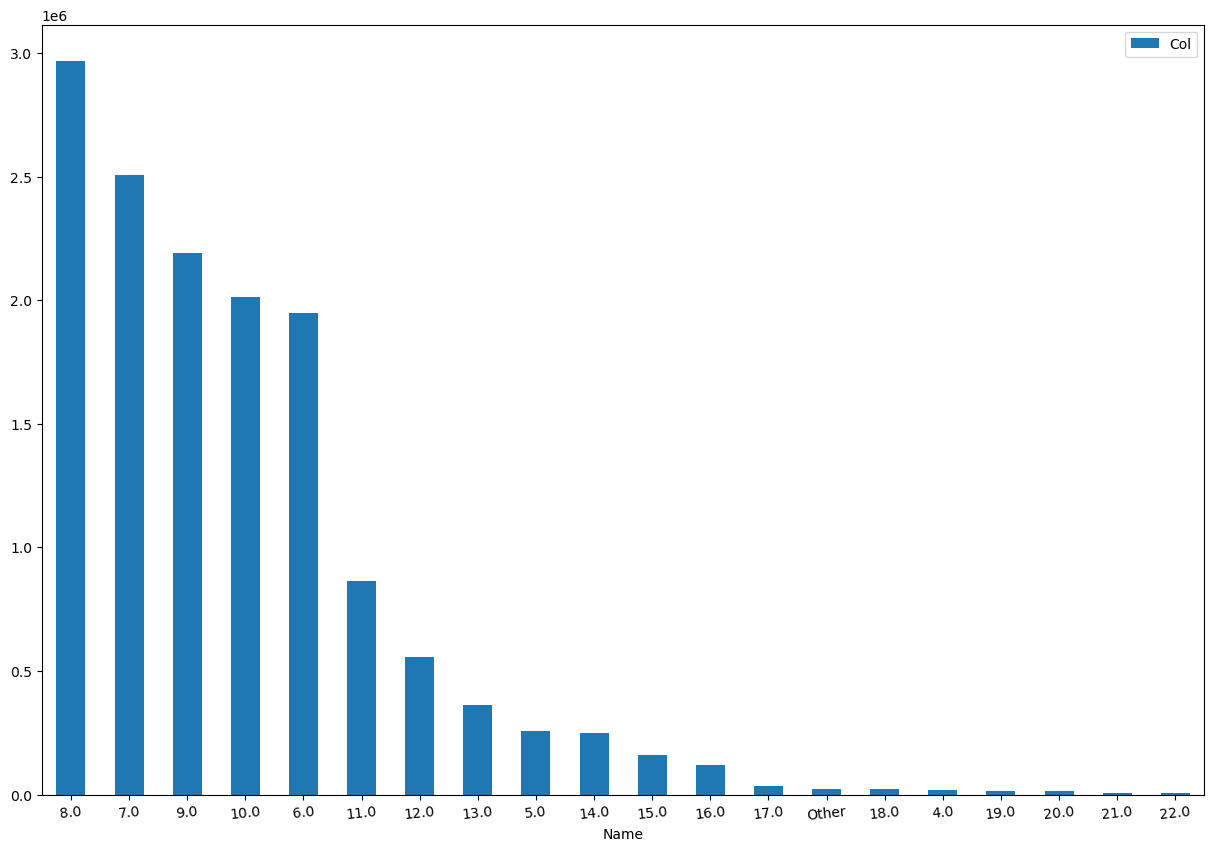

In [93]:
colichestvo_word = pd.DataFrame({'Name':name_col_word, 'Col':num_col_word})

colichestvo_word['Col']=pd.to_numeric(colichestvo_word['Col'], errors='coerce')

little_word = colichestvo_word[colichestvo_word.Col<5000]
big_word = colichestvo_word[colichestvo_word.Col>=5000]

lit_word_sum = little_word.Col.sum()
little_word=pd.Series(lit_word_sum, index=["Col"])

bar_col_word = big_word.append(pd.Series(lit_word_sum, index=["Col"], name="24"))
bar_col_word.Name = bar_col_word.Name.fillna('Other')
bar_col_word = bar_col_word.sort_values('Col', ascending=False)
bar_col_word.plot(kind="bar", y="Col", x="Name", rot=6, fontsize=10, figsize=(15,10))

/tmp/ipykernel_4618/2798823121.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  BarAlf = MainAlf.append(pd.Series(OtherAlfSum, index=["CSign"], name="24"))


<Axes: xlabel='NSign'>

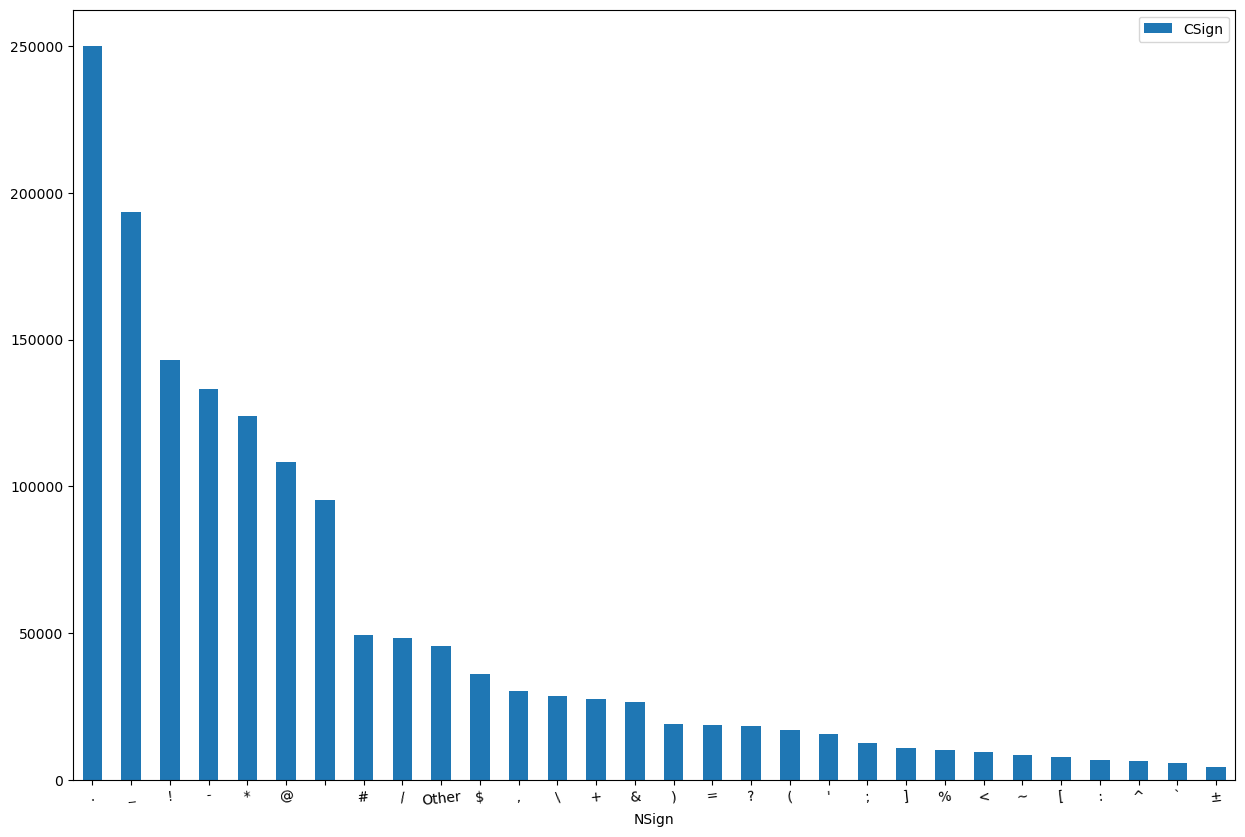

In [70]:
colich_sign = pd.DataFrame({'NSign':signs_name, 'CSign':signs_val})

colich_sign['CSign']=pd.to_numeric(colich_sign['CSign'], errors='coerce')

other_sign = colich_sign[colich_sign.CSign<3000]
main_sign = colich_sign[colich_sign.CSign>=3000]

other_signSum = other_sign.CSign.sum()
other_sign=pd.Series(other_signSum, index=["CSign"])

bar_sign = main_sign.append(pd.Series(other_signSum, index=["CSign"], name="24"))
bar_sign.NSign = bar_sign.NSign.fillna('Other')
bar_sign = bar_sign.sort_values('CSign', ascending=False)

bar_sign.plot(kind="bar", y="CSign", x="NSign", rot=6, fontsize=10, figsize=(15,10))

In [94]:
my_word_for_analysis = ['password','love','man','woman', 'you','qwerty','superman','sexy','football','baseball','monkey','luck','kill']
my_word_for_analysis_val=[]

for i in range(len(my_word_for_analysis)): my_word_for_analysis_val.append(0)

for k in arr.Password:
    for word in my_word_for_analysis:
        if isinstance(k, Iterable) and word in k.lower():
            my_word_for_analysis_val[my_word_for_analysis.index(word)]+=1
            
for i in my_word_for_analysis:
    print(i, my_word_for_analysis_val[my_word_for_analysis.index(i)])

password 4687
love 206789
man 138114
woman 1497
you 46680
qwerty 2066
superman 1167
sexy 35665
football 1621
baseball 760
monkey 7623
luck 7585
kill 13773


In [96]:
eng_ten_word = pd.read_excel('10000eng.xlsx')
eng_ten_word

,Word
0,had
1,than
2,million
3,who
4,In
...,...
4951,totaling
4952,announcing
4953,guarantees
4954,Contra


In [117]:
poskof=0
delpos=[]
for k in eng_ten_word.Word:
    if isinstance(k, str):
        if "'" in k or len(k)<3 or k.isupper() or k[0].isupper() or len(k)>8:
            delpos.append(poskof)
    poskof+=1
eng_ten_word=eng_ten_word.drop(delpos).reset_index(drop=True)

In [133]:
delpos=[]
poskof=0
for k in eng_ten_word.Word:
    if isinstance(k, str):
        for j in eng_ten_word.Word:
            if (k+"s")==j or (k+"es")==j or (k+k[2]+"ing")==j or (k+"ing")==j or (k+k[2]+"s")==j or (k+k[2]+"es")==j or (k+"ed")==j or (k+k[2]+"ed")==j:
                delpos.append(poskof)
        poskof+=1
eng_ten_word=eng_ten_word.drop(delpos).reset_index(drop=True)        

In [134]:
eng_ten_word

,Word
0,had
1,than
2,who
3,you
4,all
...,...
2296,metric
2297,speaker
2298,gotten
2299,waves


In [138]:
word_eng = [str(i) for i in eng_ten_word.Word]
word_eng_val = [0 for i in range(len(word_eng))]
paslow = arr['Password'].str.lower()
paslow = paslow[paslow.str.len() < 14]
word_indices = {word: index for index, word in enumerate(word_eng)}
j=0

In [139]:
for k in paslow:
    for word in word_eng:
        if word in k:
            word_eng_val[word_indices[word]]+=1

In [ ]:
for i in word_eng:
    print(i, word_eng_val[word_eng.index(i)])

<Axes: xlabel='Word'>

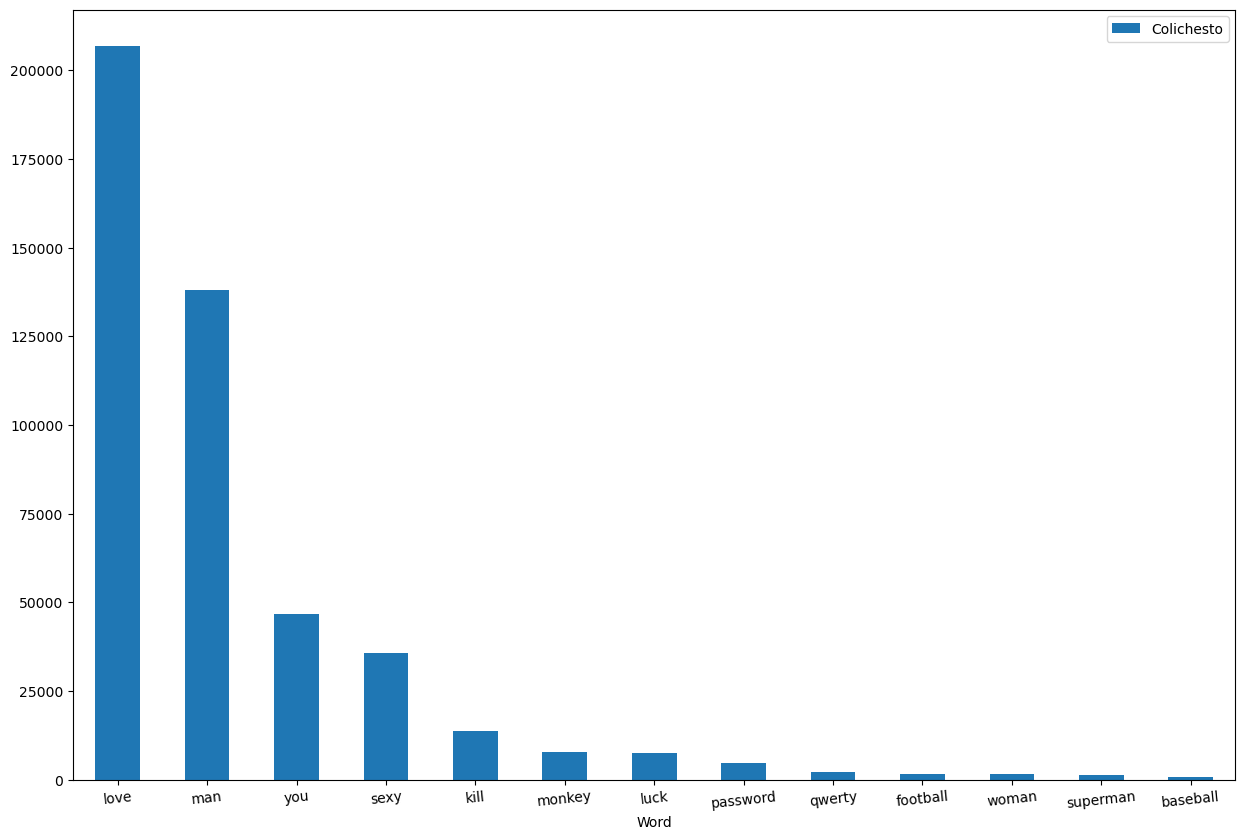

In [135]:
my_word_analysis_pd = pd.DataFrame({'Word':my_word_for_analysis, 'Colichesto':my_word_for_analysis_val})
my_word_analysis_pd = my_word_analysis_pd.sort_values('Colichesto', ascending=False)

my_word_analysis_pd.plot(kind="bar", y="Colichesto", x="Word", rot=6, fontsize=10, figsize=(15,10))

<Axes: xlabel='Word'>

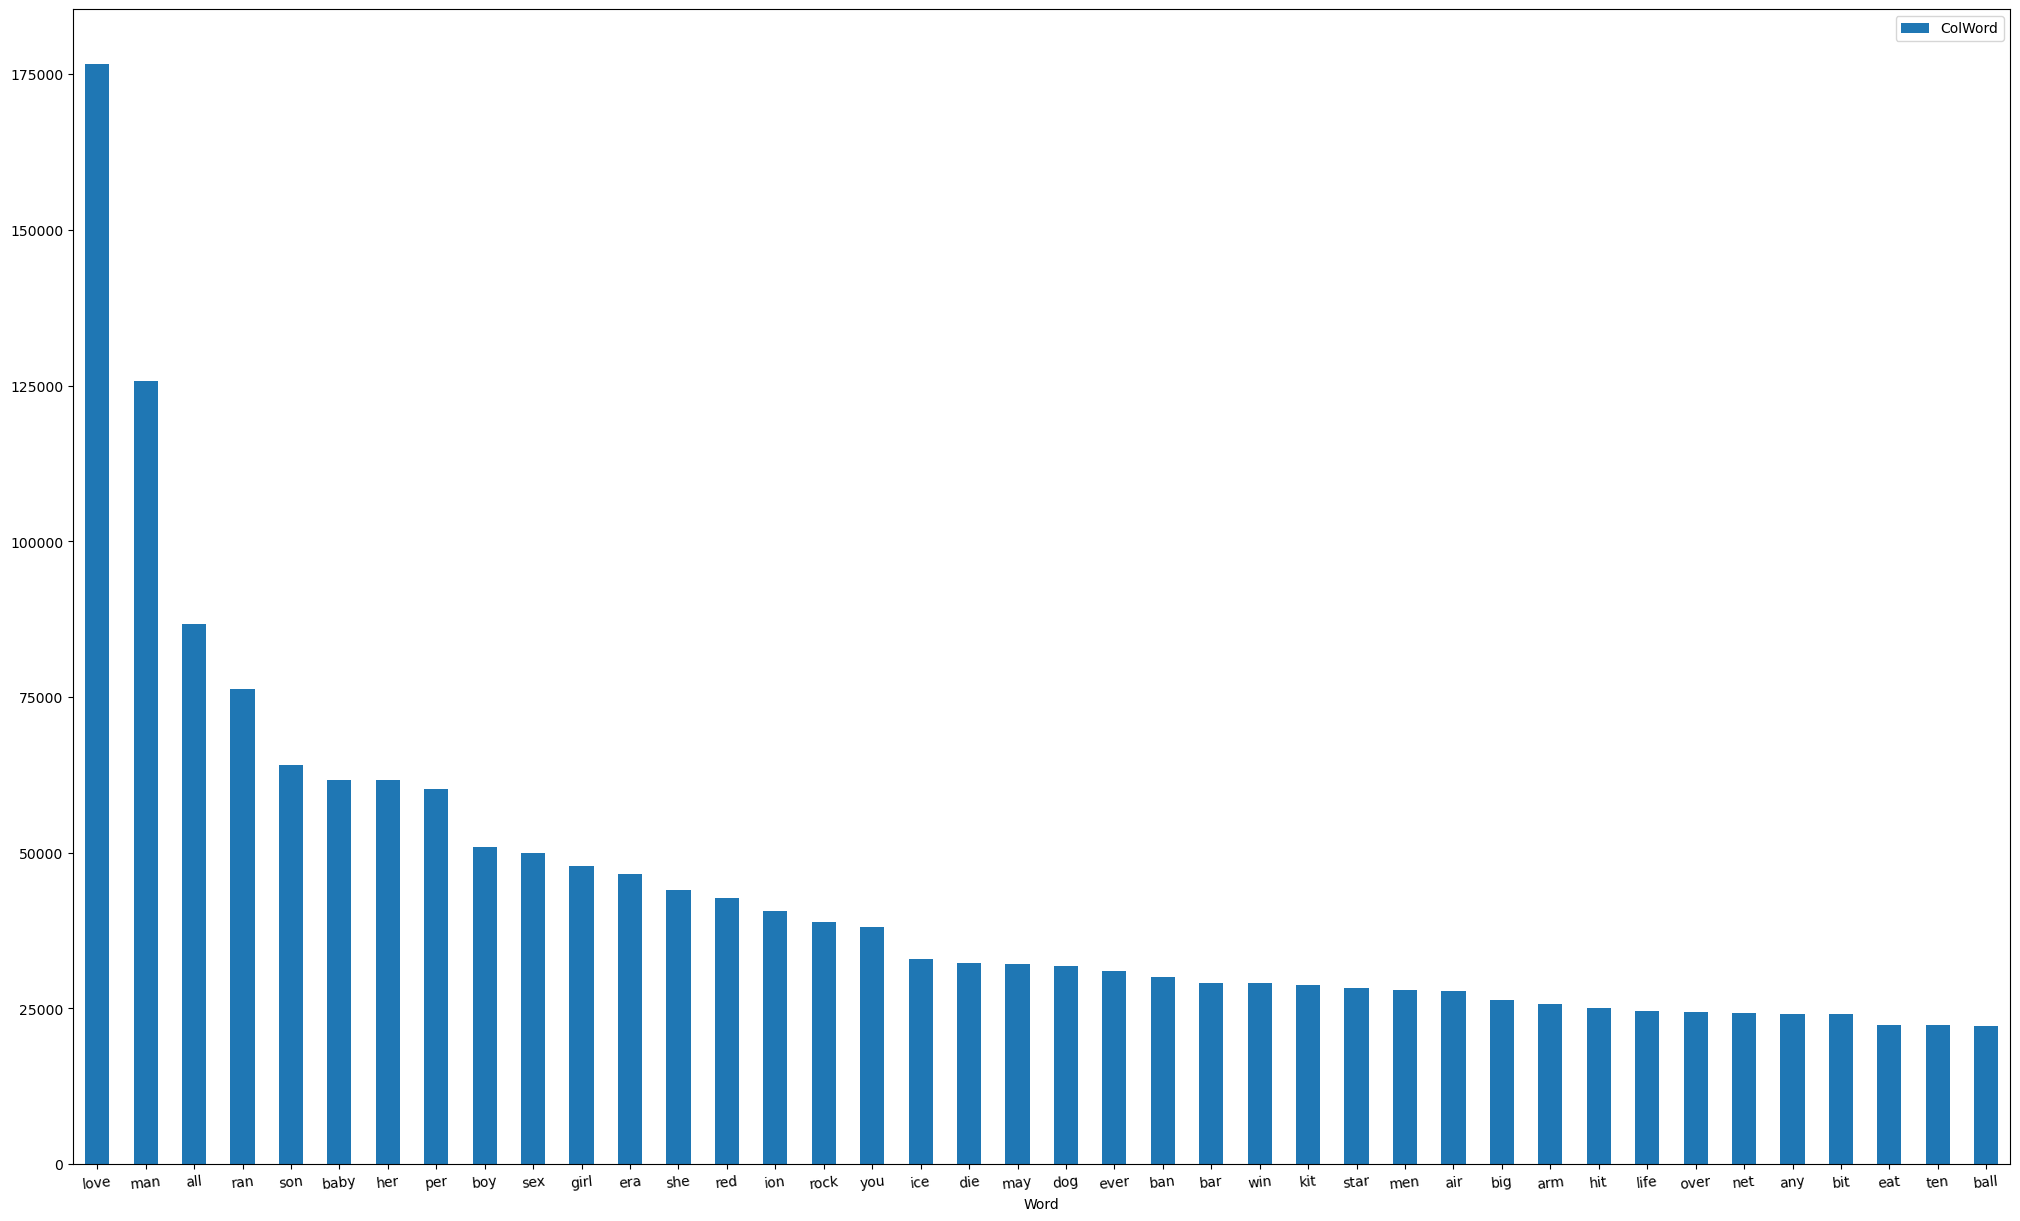

In [141]:
word_ten_analysis = pd.DataFrame({'Word':word_eng, 'ColWord':word_eng_val})
word_ten_analysis['ColWord']=pd.to_numeric(word_ten_analysis['ColWord'], errors='coerce')

main_word = word_ten_analysis[word_ten_analysis.ColWord>=20000]

main_word = main_word.sort_values('ColWord', ascending=False)

main_word.plot(kind="bar", y="ColWord", x="Word", rot=6, fontsize=10, figsize=(25,15))


In [144]:
password=""

koef_alf_up=1
koef_num=1
koef_len=1
koef_sign=1
koef_have=0
koef_rep=1
#koefHeh=0
koef_in_have=0
lenpass = len(password)


reclen=0
k , t=0 , 0
for i in bar_pas_col.NameColW:
    if k==8:break
    reclen+=i
    k+=1
    
reclen/=8
reclen=round(reclen)

if lenpass<reclen: 
    koef_len+=0

for i in range(lenpass):
    if password[i].isupper():
        koef_alf_up=0
        break

for i in range(lenpass):
    if str(password[i]) in SignsName:
        koef_sign=0
        break

for i in arr.Password: 
    if password == str(i): 
        koef_have=1
        break
            
for i in range(lenpass):
    if password[i].isnumeric():
        koef_num=0
        break

for i in my_word_analysis_pd.Word: 
    if str(i) in password: 
        koef_in_have+=1 
        
    
            
print(a)




NameError: name 'a' is not defined